In [1]:
import pandas as pd
import numpy as np
import os

# Check current working directory (optional)
print("Current working directory:", os.getcwd())

# Read the CSV file
df = pd.read_csv(r'/root/autodl-tmp/clean AAC concrete dataset large ratio.csv')

# Remove the row where the "Ref." column equals "[107]" and 13
df = df[~df["Ref."].isin(["[107]"])]

# Define original feature columns and target columns
original_feature_cols = [
    "SiO2", "Al2O3", "Fe2O3", "CaO", "MgO", "Na2O", "K2O", "SO3",
    "TiO2", "P2O5", "SrO", "Mn2O3", "MnO", "LOI", 
    "AL/B", "SH/SS", "Ms", "Ag/B", "W/B", "Sp/B",
    "Initial curing time (day)", "Initial curing temp (C)", 
    "Initial curing rest time (day)", "Final curing temp (C)", 
    "Concentration (M) NaOH"
]

target_cols = ["7d CS", "28d CS"]

# Drop unwanted columns: "MnO", "Initial curing time (day)", "Initial curing rest time (day)"
cols_to_drop = ["MnO", "Initial curing time (day)", "Initial curing rest time (day)"]
df = df.drop(columns=cols_to_drop)

# Update the feature columns list accordingly (remove dropped columns)
feature_cols = [
    "SiO2", "Al2O3", "Fe2O3", "CaO", "MgO", "Na2O", "K2O", "SO3",
    "TiO2", "P2O5", "SrO", "Mn2O3", "LOI", 
    "AL/B", "SH/SS", "Ms", "Ag/B", "W/B", "Sp/B",
    "Initial curing temp (C)", "Final curing temp (C)", 
    "Concentration (M) NaOH"
]

# Convert target columns to numeric (replacing empty strings with NaN)
for col in target_cols:
    df[col] = pd.to_numeric(df[col].replace(' ', np.nan), errors='coerce')

# Print missing values in target columns
print("Missing values in target columns:")
print(df[target_cols].isnull().sum())

# Drop rows with missing target values
df_clean = df.dropna(subset=target_cols)
print(f"Dataset shape after dropping rows with missing targets: {df_clean.shape}")

# Fill missing values in specific feature columns using the median
df_clean["Na2O"] = df_clean["Na2O"].fillna(df_clean["Na2O"].median())
df_clean["Concentration (M) NaOH"] = df_clean["Concentration (M) NaOH"].fillna(df_clean["Concentration (M) NaOH"].median())

# Extract feature and target arrays
X = df_clean[feature_cols].values
y_7 = df_clean["7d CS"].values
y_28 = df_clean["28d CS"].values

print("X shape:", X.shape)
print("y_7 shape:", y_7.shape)
print("y_28 shape:", y_28.shape)


Current working directory: /root/autodl-tmp
Missing values in target columns:
7d CS     621
28d CS    667
dtype: int64
Dataset shape after dropping rows with missing targets: (603, 73)
X shape: (603, 22)
y_7 shape: (603,)
y_28 shape: (603,)


/tmp/ipykernel_2708/2980819449.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Na2O"] = df_clean["Na2O"].fillna(df_clean["Na2O"].median())
/tmp/ipykernel_2708/2980819449.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Concentration (M) NaOH"] = df_clean["Concentration (M) NaOH"].fillna(df_clean["Concentration (M) NaOH"].median())


In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: Display summary statistics to check scaling
import pandas as pd
scaled_df = pd.DataFrame(X_scaled, columns=feature_cols)
print("Summary statistics for scaled features:")
print(scaled_df.describe().loc[['mean', 'std']].T)


Summary statistics for scaled features:
                                 mean      std
SiO2                    -3.004783e-16  1.00083
Al2O3                   -2.356692e-17  1.00083
Fe2O3                    0.000000e+00  1.00083
CaO                      1.178346e-16  1.00083
MgO                     -1.060512e-16  1.00083
Na2O                     1.178346e-17  1.00083
K2O                     -2.121023e-16  1.00083
SO3                     -1.060512e-16  1.00083
TiO2                    -4.713385e-17  1.00083
P2O5                    -1.178346e-16  1.00083
SrO                      0.000000e+00  1.00083
Mn2O3                    2.356692e-17  1.00083
LOI                      3.535038e-17  1.00083
AL/B                     3.004783e-16  1.00083
SH/SS                   -4.713385e-17  1.00083
Ms                       4.713385e-16  1.00083
Ag/B                     2.651279e-16  1.00083
W/B                      1.001594e-16  1.00083
Sp/B                    -5.891731e-17  1.00083
Initial curing temp 

In [3]:
# Check missing values in the original DataFrame for feature and target columns
print("Missing values in original DataFrame:")
print(df[feature_cols + target_cols].isnull().sum())

# Check missing values in cleaned DataFrame
print("Missing values in cleaned DataFrame:")
print(df_clean[feature_cols + target_cols].isnull().sum())


Missing values in original DataFrame:
SiO2                         0
Al2O3                        0
Fe2O3                        0
CaO                          0
MgO                          0
Na2O                         1
K2O                          2
SO3                          0
TiO2                         0
P2O5                         0
SrO                          0
Mn2O3                        0
LOI                          0
AL/B                         0
SH/SS                        0
Ms                           0
Ag/B                         0
W/B                          0
Sp/B                         0
Initial curing temp (C)      1
Final curing temp (C)        0
Concentration (M) NaOH      18
7d CS                      621
28d CS                     667
dtype: int64
Missing values in cleaned DataFrame:
SiO2                       0
Al2O3                      0
Fe2O3                      0
CaO                        0
MgO                        0
Na2O                   

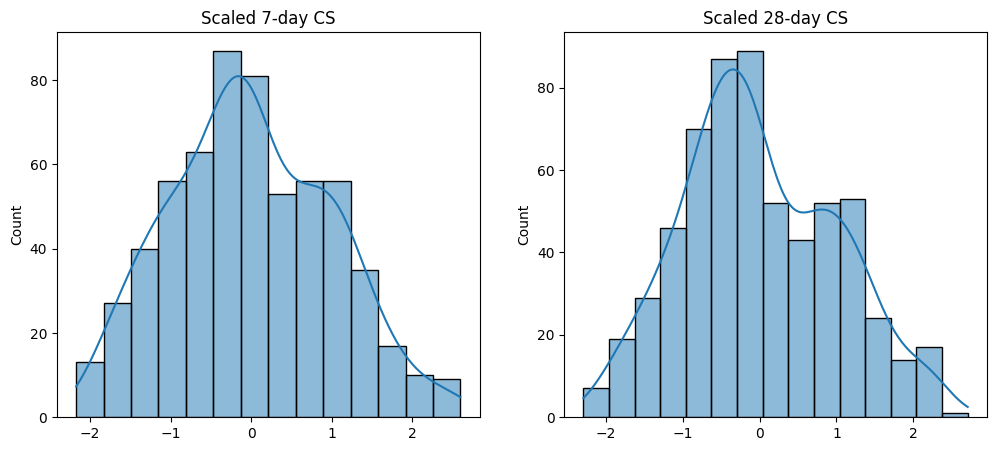

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for targets (assumes y_7 and y_28 are defined from your cleaned dataset)
targets_df = pd.DataFrame({
    "7d CS": y_7,
    "28d CS": y_28
})

# Initialize and fit a scaler on the targets
target_scaler = StandardScaler()
targets_scaled = target_scaler.fit_transform(targets_df)

# Split the scaled targets into separate arrays
y_7_scaled = targets_scaled[:, 0]
y_28_scaled = targets_scaled[:, 1]

# Optional: Visualize the scaled target distributions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(y_7_scaled, kde=True)
plt.title("Scaled 7-day CS")

plt.subplot(1, 2, 2)
sns.histplot(y_28_scaled, kde=True)
plt.title("Scaled 28-day CS")
plt.show()


In [5]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        # features is already scaled (X_scaled)
        self.z = torch.tensor(features, dtype=torch.float32)
        # Combine scaled targets into a tensor of shape (n_samples, 2)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        # Fixed time vector for all samples
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    
    def __len__(self):
        return self.z.shape[0]
    
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# Create the dataset and DataLoader (using full-batch training)
dataset_scaled = ConcreteDatasetScaled(X_scaled, y_7_scaled, y_28_scaled)
dataloader_scaled = DataLoader(dataset_scaled, batch_size=len(dataset_scaled))  # full batch

print("Dataset size (scaled targets):", len(dataset_scaled))


Dataset size (scaled targets): 603


Final Training dataset size: 482
Test dataset size: 121

--- Final Model Training ---
Epoch 50/500, Training NLL Loss: 1.9579
Epoch 100/500, Training NLL Loss: 0.6816
Epoch 150/500, Training NLL Loss: 0.2459
Epoch 200/500, Training NLL Loss: 0.0778
Epoch 250/500, Training NLL Loss: -0.0858
Epoch 300/500, Training NLL Loss: -0.2282
Epoch 350/500, Training NLL Loss: -0.3203
Epoch 400/500, Training NLL Loss: -0.3562
Epoch 450/500, Training NLL Loss: -0.4397
Epoch 500/500, Training NLL Loss: -0.4682

--- MC Dropout Inference on Test Set ---

Final Test R² for 7-day compressive strength: 0.8248323798179626
Final Test R² for 28-day compressive strength: 0.792346715927124

First 10 predicted means for 7-day: [48.668835 38.69793  50.096672 43.30047  26.627785 16.619478 21.180635
 22.525307 44.016136 27.996733]
First 10 predicted std dev for 7-day: [1.27160332 1.40044666 2.00129229 1.40225509 1.45157959 1.36675618
 2.06071205 2.754113   1.23729229 1.61318863]
First 10 predicted means for 28-day

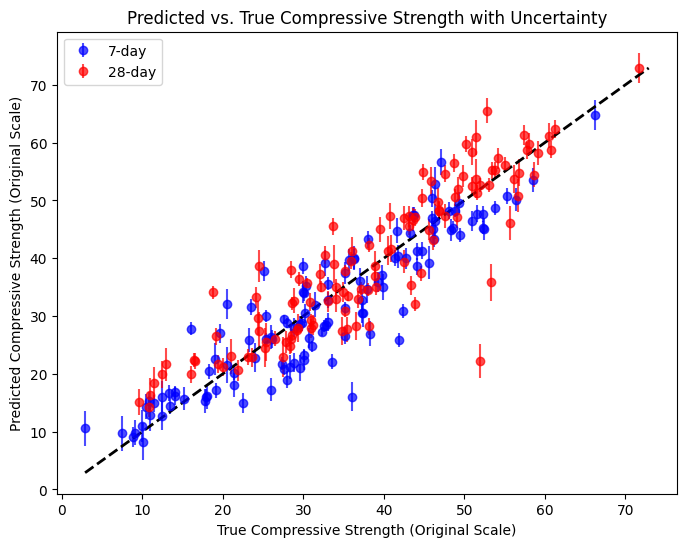

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import copy
import matplotlib.pyplot as plt

# =============================================================================
# 0. Data Preparation for Final Training and Testing
# =============================================================================
# Assume X_scaled, y_7_scaled, y_28_scaled, and targets_df are available.
# Split: 80% for training and 20% for testing.
X_train_full, X_test, y7_train_full, y7_test, y28_train_full, y28_test = train_test_split(
    X_scaled, y_7_scaled, y_28_scaled, test_size=0.2, random_state=42)

# =============================================================================
# Skip removal of the test points corresponding to the common worst-prediction indices.
# =============================================================================
# The common_indices removal step is omitted; we simply assign the test arrays.
X_test_clean = X_test
y7_test_clean = y7_test
y28_test_clean = y28_test

# =============================================================================
# Dataset Class
# =============================================================================
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    def __len__(self):
        return self.z.shape[0]
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# Create test dataset from the (unchanged) test arrays.
test_dataset_clean = ConcreteDatasetScaled(X_test_clean, y7_test_clean, y28_test_clean)

# Create final training dataset (unchanged) and its loader.
train_dataset_full = ConcreteDatasetScaled(X_train_full, y7_train_full, y28_train_full)
train_loader_full = DataLoader(train_dataset_full, batch_size=len(train_dataset_full))

# Create a DataLoader for the test set.
test_loader_clean = DataLoader(test_dataset_clean, batch_size=len(test_dataset_clean))

print("Final Training dataset size:", len(train_dataset_full))
print("Test dataset size:", len(test_dataset_clean))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# =============================================================================
# 1. Model Definition (Same as before)
# =============================================================================
class AGPModelGP_v2(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.1):
        super(AGPModelGP_v2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.bn1 = nn.BatchNorm1d(hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.bn2 = nn.BatchNorm1d(hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.bn3 = nn.BatchNorm1d(hidden_dims[2])
        self.dropout = nn.Dropout(dropout_rate)
        self.fc4 = nn.Linear(hidden_dims[2], 5)
        self.softplus = nn.Softplus()
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        out = self.fc4(x)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

model_class = AGPModelGP_v2
input_dim = X_scaled.shape[1]

# =============================================================================
# 2. GP Negative Log Likelihood Loss Function (Same as before)
# =============================================================================
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        L_mat = torch.linalg.cholesky(K)
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# =============================================================================
# 3. MC Dropout Inference Function for Testing
# =============================================================================
def mc_predict_with_uncertainty(model, dataloader, t, num_samples=50, epsilon=1e-6):
    model.train()  # Enable dropout during inference
    all_mc_means = []
    all_kernel_vars = []
    for z, _, y in dataloader:
        z = z.to(device)
        t_fixed_in = t.to(device)
        mc_sample_means = []
        mc_sample_vars = []
        for _ in range(num_samples):
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            m = theta1.unsqueeze(1) * torch.log(t_fixed_in + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            mc_sample_means.append(m.detach().cpu().numpy())
            # Compute kernel variance for each sample in the batch.
            batch_kernel_vars = []
            for i in range(z.size(0)):
                diff = t_fixed_in.unsqueeze(0) - t_fixed_in.unsqueeze(1)  # (2, 2)
                K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
                K = K + sigma_n[i]**2 * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K = K + epsilon * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K_inv = torch.linalg.inv(K)
                var_i = []
                for j in range(t_fixed_in.size(0)):
                    k_j = K[:, j].unsqueeze(1)
                    var_j = K[j, j] - (k_j.t() @ K_inv @ k_j).item()
                    var_i.append(float(max(var_j, 0)))
                batch_kernel_vars.append(var_i)
            mc_sample_vars.append(np.array(batch_kernel_vars))
        mc_sample_means = np.array(mc_sample_means)  # (num_samples, batch_size, n_t)
        mc_sample_vars = np.array(mc_sample_vars)      # (num_samples, batch_size, n_t)
        avg_kernel_vars = np.mean(mc_sample_vars, axis=0)  # (batch_size, n_t)
        all_mc_means.append(mc_sample_means)
        all_kernel_vars.append(avg_kernel_vars)
    
    mc_means = np.concatenate(all_mc_means, axis=1)  # (num_samples, total_samples, n_t)
    mc_vars = np.concatenate(all_kernel_vars, axis=0)  # (total_samples, n_t)
    
    pred_mean = np.mean(mc_means, axis=0)  # Predictive mean
    pred_epistemic_var = np.var(mc_means, axis=0)  # Epistemic uncertainty
    pred_total_var = pred_epistemic_var + mc_vars  # Total predictive variance
    
    return pred_mean, pred_total_var

# =============================================================================
# 4. Define a Simple Training Loop Function (train_gp_model)
# =============================================================================
def train_gp_model(model, train_loader, t, optimizer, num_epochs=300):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0.0
        for z, _, y in train_loader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch + 1) % 50 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{num_epochs}, Training NLL Loss: {avg_loss:.4f}")
    return model

# =============================================================================
# 5. Final Training and Testing on the Held-out Test Set
# =============================================================================
# Best hyperparameters from tuning (example values).
best_dropout = 0.05
best_lr = 0.002
best_hidden_dims = [128, 128, 64]

# Initialize and train the final model on the full training set.
model_final = model_class(input_dim, hidden_dims=best_hidden_dims, dropout_rate=best_dropout).to(device)
optimizer_final = optim.Adam(model_final.parameters(), lr=best_lr)
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

print("\n--- Final Model Training ---")
model_final = train_gp_model(model_final, train_loader_full, t_fixed, optimizer_final, num_epochs=500)

# Perform MC Dropout inference on the test set.
print("\n--- MC Dropout Inference on Test Set ---")
mc_mean, mc_var = mc_predict_with_uncertainty(model_final, test_loader_clean, t_fixed, num_samples=50)

# Convert predictions from the scaled space to the original space.
y_pred_original = target_scaler.inverse_transform(mc_mean)

# Convert variance from scaled to original space.
std_scale = target_scaler.scale_  # e.g., [std_7, std_28]
var_7_original = mc_var[:, 0] * (std_scale[0]**2)
var_28_original = mc_var[:, 1] * (std_scale[1]**2)
std_7_original = np.sqrt(var_7_original)
std_28_original = np.sqrt(var_28_original)

# Evaluate R² on the test set using the predictive mean.
_, _, y_test_clean = next(iter(test_loader_clean))
y_test_clean_np = y_test_clean.numpy()
y_true_original = target_scaler.inverse_transform(y_test_clean_np)

r2_7_final = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
r2_28_final = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("\nFinal Test R² for 7-day compressive strength:", r2_7_final)
print("Final Test R² for 28-day compressive strength:", r2_28_final)

# Print first 10 predicted means and standard deviations.
print("\nFirst 10 predicted means for 7-day:", y_pred_original[:10, 0])
print("First 10 predicted std dev for 7-day:", std_7_original[:10])
print("First 10 predicted means for 28-day:", y_pred_original[:10, 1])
print("First 10 predicted std dev for 28-day:", std_28_original[:10])

# -----------------------------------------------------------------------------
# Plot: Predicted vs. True with Uncertainty Error Bars
# -----------------------------------------------------------------------------
min_val = min(np.min(y_true_original), np.min(y_pred_original))
max_val = max(np.max(y_true_original), np.max(y_pred_original))

plt.figure(figsize=(8, 6))
plt.errorbar(y_true_original[:, 0], y_pred_original[:, 0],
             yerr=std_7_original, fmt='o', label='7-day', alpha=0.7, color='blue')
plt.errorbar(y_true_original[:, 1], y_pred_original[:, 1],
             yerr=std_28_original, fmt='o', label='28-day', alpha=0.7, color='red')
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
plt.xlabel("True Compressive Strength (Original Scale)")
plt.ylabel("Predicted Compressive Strength (Original Scale)")
plt.title("Predicted vs. True Compressive Strength with Uncertainty")
plt.legend()
plt.show()


In [7]:
# --- After final evaluation code ---

# Compute residuals for each target.
error_7 = y_true_original[:, 0] - y_pred_original[:, 0]
error_28 = y_true_original[:, 1] - y_pred_original[:, 1]

# Combine errors into a single measure using the Euclidean norm.
combined_error = np.sqrt(error_7**2 + error_28**2)

# Compute the z-scores for the combined error.
mean_error = np.mean(combined_error)
std_error = np.std(combined_error)
z_scores = (combined_error - mean_error) / std_error

# Get indices sorted by error in descending order (largest errors first).
sorted_indices = np.argsort(combined_error)[::-1]

# Select the worst 20 indices.
worst_indices = sorted_indices[:20]

print("Worst Points with Original Features (z):")
for idx in worst_indices:
    # Retrieve the scaled features 'z' for this sample from the test dataset.
    scaled_features = test_dataset_clean.z[idx].numpy()  # scaled feature values
    # Convert back to the original feature space using the inverse transform.
    # Here, we use 'scaler', which was fitted on the original features.
    original_features = scaler.inverse_transform(scaled_features.reshape(1, -1)).flatten()
    print(f"Index: {idx}, Combined Error: {combined_error[idx]:.4f}, z-score: {z_scores[idx]:.4f}")
    print(f"Original Features: {original_features}\n")


Worst Points with Original Features (z):
Index: 52, Combined Error: 35.8846, z-score: 6.0590
Original Features: [ 5.2750000e+01  1.9969999e+01  2.2849998e+00  2.0565001e+01
  1.0249999e+00  4.7000000e-01  8.8499999e-01  2.0000000e-01
  5.4500002e-01 -7.6973272e-09  6.5961521e-11  1.0238435e-09
  1.4300001e+00  1.9175258e-01  5.0000000e-01  2.2000000e+00
  4.5000000e+00  9.9999994e-02 -5.3896970e-10  2.5000000e+01
  2.4000000e+01  2.9999993e+00]

Index: 11, Combined Error: 20.7707, z-score: 2.9267
Original Features: [ 4.5247196e+01  2.4956387e+01  2.4386370e+00  1.7409403e+01
  5.3946247e+00  1.8447165e-01  7.1843797e-01  1.4319066e-08
  1.2038745e+00  2.4817458e-01  6.5961521e-11  1.0238435e-09
  8.2055134e-01  2.2970903e-01  8.5185188e-01  2.0000000e+00
  2.1000001e+00  3.0000001e-01 -5.3896970e-10  2.5000000e+01
  2.4000000e+01  8.0000000e+00]

Index: 26, Combined Error: 19.8442, z-score: 2.7347
Original Features: [5.0500000e+01 2.6570000e+01 1.3770000e+01 2.1299996e+00 1.5400000e+00

In [8]:
import numpy as np
from sklearn.metrics import r2_score
import copy

# First, compute the baseline performance using the test set.
model_final.eval()
mc_mean, _ = mc_predict_with_uncertainty(model_final, test_loader_clean, t_fixed, num_samples=50)
y_pred_original = target_scaler.inverse_transform(mc_mean)
_, _, y_test_clean_tensor = next(iter(test_loader_clean))
y_test_clean_np = y_test_clean_tensor.numpy()
y_true_original = target_scaler.inverse_transform(y_test_clean_np)

baseline_r2_7 = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
baseline_r2_28 = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
print("Baseline R² 7-day:", baseline_r2_7)
print("Baseline R² 28-day:", baseline_r2_28)

# List of feature names (should match the columns in X_scaled used in training)
feature_names = ["SiO2", "Al2O3", "Fe2O3", "CaO", "MgO", "Na2O", "K2O", "SO3",
                 "TiO2", "P2O5", "SrO", "Mn2O3", "LOI", 
                 "AL/B", "SH/SS", "Ms", "Ag/B", "W/B", "Sp/B",
                 "Initial curing temp (C)", "Final curing temp (C)", 
                 "Concentration (M) NaOH"]

# Initialize dictionaries to store importance values.
# We define importance as the drop in R² when a feature is permuted.
importance_7 = {}
importance_28 = {}

# Create a copy of the original X_test_clean to use for permutation.
X_test_orig = copy.deepcopy(X_test_clean)

# For each feature, permute its values and re-calculate R².
n_repeats = 5  # Optionally, average over several random shuffles for stability.
for i, feat in enumerate(feature_names):
    r2_7_list = []
    r2_28_list = []
    for _ in range(n_repeats):
        X_test_permuted = copy.deepcopy(X_test_orig)
        np.random.shuffle(X_test_permuted[:, i])  # Permute values in column i

        # Create a new dataset and DataLoader using the permuted features.
        permuted_dataset = ConcreteDatasetScaled(X_test_permuted, y7_test_clean, y28_test_clean)
        permuted_loader = DataLoader(permuted_dataset, batch_size=len(permuted_dataset))
        
        # Get model predictions on the permuted dataset.
        mc_mean_perm, _ = mc_predict_with_uncertainty(model_final, permuted_loader, t_fixed, num_samples=50)
        y_pred_perm = target_scaler.inverse_transform(mc_mean_perm)
        
        # Compute R² scores.
        _, _, y_perm_tensor = next(iter(permuted_loader))
        y_perm_np = y_perm_tensor.numpy()
        y_true_perm = target_scaler.inverse_transform(y_perm_np)
        
        r2_7_perm = r2_score(y_true_perm[:, 0], y_pred_perm[:, 0])
        r2_28_perm = r2_score(y_true_perm[:, 1], y_pred_perm[:, 1])
        
        r2_7_list.append(r2_7_perm)
        r2_28_list.append(r2_28_perm)
    
    # Average the performance over several shuffles.
    avg_r2_7 = np.mean(r2_7_list)
    avg_r2_28 = np.mean(r2_28_list)
    
    # Compute importance as the drop in performance compared to the baseline.
    importance_7[feat] = baseline_r2_7 - avg_r2_7
    importance_28[feat] = baseline_r2_28 - avg_r2_28

# Print the feature importance for each target.
print("\nFeature Importance for 7-day compressive strength (R² drop):")
for feat, imp in importance_7.items():
    print(f"{feat}: {imp:.4f}")

print("\nFeature Importance for 28-day compressive strength (R² drop):")
for feat, imp in importance_28.items():
    print(f"{feat}: {imp:.4f}")


Baseline R² 7-day: 0.8250330686569214
Baseline R² 28-day: 0.7935654520988464

Feature Importance for 7-day compressive strength (R² drop):
SiO2: 0.3747
Al2O3: 0.1820
Fe2O3: 0.1357
CaO: 0.0931
MgO: 0.0196
Na2O: 0.0378
K2O: 0.0574
SO3: 0.0774
TiO2: 0.0396
P2O5: 0.0895
SrO: 0.0241
Mn2O3: 0.0487
LOI: 0.0160
AL/B: 0.1892
SH/SS: 0.1048
Ms: 0.0724
Ag/B: 0.1680
W/B: 0.1466
Sp/B: 0.0623
Initial curing temp (C): 0.6267
Final curing temp (C): 0.0314
Concentration (M) NaOH: 0.3701

Feature Importance for 28-day compressive strength (R² drop):
SiO2: 0.4385
Al2O3: 0.2243
Fe2O3: 0.1404
CaO: 0.1217
MgO: 0.0152
Na2O: 0.0357
K2O: 0.0433
SO3: 0.1044
TiO2: 0.0256
P2O5: 0.0791
SrO: 0.0207
Mn2O3: 0.0489
LOI: 0.0207
AL/B: 0.1788
SH/SS: 0.1381
Ms: 0.0811
Ag/B: 0.1557
W/B: 0.1681
Sp/B: 0.0419
Initial curing temp (C): 0.4045
Final curing temp (C): 0.0346
Concentration (M) NaOH: 0.4692


In [9]:
print("\nFeature Importance for 7-day compressive strength (R² drop) sorted high-to-low:")
for feat, imp in sorted(importance_7.items(), key=lambda x: x[1], reverse=True):
    print(f"{feat}: {imp:.4f}")

print("\nFeature Importance for 28-day compressive strength (R² drop) sorted high-to-low:")
for feat, imp in sorted(importance_28.items(), key=lambda x: x[1], reverse=True):
    print(f"{feat}: {imp:.4f}")


Feature Importance for 7-day compressive strength (R² drop) sorted high-to-low:
Initial curing temp (C): 0.6267
SiO2: 0.3747
Concentration (M) NaOH: 0.3701
AL/B: 0.1892
Al2O3: 0.1820
Ag/B: 0.1680
W/B: 0.1466
Fe2O3: 0.1357
SH/SS: 0.1048
CaO: 0.0931
P2O5: 0.0895
SO3: 0.0774
Ms: 0.0724
Sp/B: 0.0623
K2O: 0.0574
Mn2O3: 0.0487
TiO2: 0.0396
Na2O: 0.0378
Final curing temp (C): 0.0314
SrO: 0.0241
MgO: 0.0196
LOI: 0.0160

Feature Importance for 28-day compressive strength (R² drop) sorted high-to-low:
Concentration (M) NaOH: 0.4692
SiO2: 0.4385
Initial curing temp (C): 0.4045
Al2O3: 0.2243
AL/B: 0.1788
W/B: 0.1681
Ag/B: 0.1557
Fe2O3: 0.1404
SH/SS: 0.1381
CaO: 0.1217
SO3: 0.1044
Ms: 0.0811
P2O5: 0.0791
Mn2O3: 0.0489
K2O: 0.0433
Sp/B: 0.0419
Na2O: 0.0357
Final curing temp (C): 0.0346
TiO2: 0.0256
SrO: 0.0207
LOI: 0.0207
MgO: 0.0152


In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, Subset
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# =============================================================================
# Assume X_scaled, y_7_scaled, y_28_scaled, and target_scaler are available.
# =============================================================================

# =============================================================================
# Dataset Class (Same as before)
# =============================================================================
class ConcreteDatasetScaled(Dataset):
    def __init__(self, features, y_7_scaled, y_28_scaled):
        self.z = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(np.vstack((y_7_scaled, y_28_scaled)).T, dtype=torch.float32)
        self.t = torch.tensor([7.0, 28.0], dtype=torch.float32)
    def __len__(self):
        return self.z.shape[0]
    def __getitem__(self, idx):
        return self.z[idx], self.t, self.y[idx]

# Create the full dataset.
full_dataset = ConcreteDatasetScaled(X_scaled, y_7_scaled, y_28_scaled)

# =============================================================================
# Model Definition (Same as before)
# =============================================================================
class AGPModelGP_v2(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.1):
        super(AGPModelGP_v2, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.bn1 = nn.BatchNorm1d(hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.bn2 = nn.BatchNorm1d(hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.bn3 = nn.BatchNorm1d(hidden_dims[2])
        self.dropout = nn.Dropout(dropout_rate)
        self.fc4 = nn.Linear(hidden_dims[2], 5)
        self.softplus = nn.Softplus()
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        out = self.fc4(x)
        theta1 = self.softplus(out[:, 0])
        theta2 = out[:, 1]
        l = torch.exp(out[:, 2])
        sigma_f = torch.exp(out[:, 3])
        sigma_n = torch.exp(out[:, 4])
        return theta1, theta2, l, sigma_f, sigma_n

model_class = AGPModelGP_v2
input_dim = X_scaled.shape[1]

# =============================================================================
# GP Negative Log Likelihood Loss Function (Same as before)
# =============================================================================
def gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t, y, epsilon=1e-6):
    batch_size = y.shape[0]
    n_t = t.shape[0]
    total_nll = 0.0
    log_t = torch.log(t + epsilon)
    for i in range(batch_size):
        m = theta1[i] * log_t + theta2[i]
        diff = t.unsqueeze(0) - t.unsqueeze(1)
        K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
        K = K + sigma_n[i]**2 * torch.eye(n_t, device=K.device)
        K = K + epsilon * torch.eye(n_t, device=K.device)
        L_mat = torch.linalg.cholesky(K)
        diff_y = (y[i] - m).unsqueeze(1)
        alpha = torch.cholesky_solve(diff_y, L_mat)
        log_det_K = 2.0 * torch.sum(torch.log(torch.diag(L_mat)))
        nll = 0.5 * diff_y.t() @ alpha + 0.5 * log_det_K + 0.5 * n_t * np.log(2 * np.pi)
        total_nll += nll.squeeze()
    return total_nll / batch_size

# =============================================================================
# MC Dropout Inference Function for Testing (Same as before)
# =============================================================================
def mc_predict_with_uncertainty(model, dataloader, t, num_samples=50, epsilon=1e-6):
    model.train()  # Enable dropout during inference
    all_mc_means = []
    all_kernel_vars = []
    for z, _, y in dataloader:
        z = z.to(device)
        t_fixed_in = t.to(device)
        mc_sample_means = []
        mc_sample_vars = []
        for _ in range(num_samples):
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            m = theta1.unsqueeze(1) * torch.log(t_fixed_in + epsilon).unsqueeze(0) + theta2.unsqueeze(1)
            mc_sample_means.append(m.detach().cpu().numpy())
            # Compute kernel variance for each sample in the batch.
            batch_kernel_vars = []
            for i in range(z.size(0)):
                diff = t_fixed_in.unsqueeze(0) - t_fixed_in.unsqueeze(1)
                K = sigma_f[i]**2 * torch.exp(-0.5 * (diff**2) / (l[i]**2))
                K = K + sigma_n[i]**2 * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K = K + epsilon * torch.eye(t_fixed_in.size(0), device=t_fixed_in.device)
                K_inv = torch.linalg.inv(K)
                var_i = []
                for j in range(t_fixed_in.size(0)):
                    k_j = K[:, j].unsqueeze(1)
                    var_j = K[j, j] - (k_j.t() @ K_inv @ k_j).item()
                    var_i.append(float(max(var_j, 0)))
                batch_kernel_vars.append(var_i)
            mc_sample_vars.append(np.array(batch_kernel_vars))
        mc_sample_means = np.array(mc_sample_means)  # (num_samples, batch_size, n_t)
        mc_sample_vars = np.array(mc_sample_vars)      # (num_samples, batch_size, n_t)
        avg_kernel_vars = np.mean(mc_sample_vars, axis=0)  # (batch_size, n_t)
        all_mc_means.append(mc_sample_means)
        all_kernel_vars.append(avg_kernel_vars)
    
    mc_means = np.concatenate(all_mc_means, axis=1)  # (num_samples, total_samples, n_t)
    mc_vars = np.concatenate(all_kernel_vars, axis=0)  # (total_samples, n_t)
    
    pred_mean = np.mean(mc_means, axis=0)  # Predictive mean
    pred_epistemic_var = np.var(mc_means, axis=0)  # Epistemic uncertainty
    pred_total_var = pred_epistemic_var + mc_vars  # Total predictive variance
    
    return pred_mean, pred_total_var

# =============================================================================
# Training Loop Function (Same as before)
# =============================================================================
def train_gp_model(model, train_loader, t, optimizer, num_epochs=500):
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0.0
        for z, _, y in train_loader:
            z, y = z.to(device), y.to(device)
            optimizer.zero_grad()
            theta1, theta2, l, sigma_f, sigma_n = model(z)
            loss = gp_neg_log_likelihood(theta1, theta2, l, sigma_f, sigma_n, t.to(device), y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch + 1) % 50 == 0:
            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{num_epochs}, Training NLL Loss: {avg_loss:.4f}")
    return model

# =============================================================================
# Cross Validation Setup
# =============================================================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Hyperparameters (example values from your tuning)
best_dropout = 0.05
best_lr = 0.002
best_hidden_dims = [128, 128, 64]
t_fixed = torch.tensor([7.0, 28.0], dtype=torch.float32)

fold_metrics = []

for fold, (train_idx, val_idx) in enumerate(kf.split(full_dataset)):
    print(f"\n=== Fold {fold+1}/{n_splits} ===")
    
    # Create DataLoader for training and validation subsets.
    train_subset = Subset(full_dataset, train_idx)
    val_subset = Subset(full_dataset, val_idx)
    train_loader = DataLoader(train_subset, batch_size=len(train_subset), shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=len(val_subset), shuffle=False)
    
    # Initialize a fresh model and optimizer for each fold.
    model = model_class(input_dim, hidden_dims=best_hidden_dims, dropout_rate=best_dropout).to(device)
    optimizer = optim.Adam(model.parameters(), lr=best_lr)
    
    # Train the model on the training fold.
    model = train_gp_model(model, train_loader, t_fixed, optimizer, num_epochs=500)
    
    # Evaluate using MC Dropout inference on the validation fold.
    mc_mean, mc_var = mc_predict_with_uncertainty(model, val_loader, t_fixed, num_samples=50)
    
    # Convert predictions and ground truth from scaled to original space.
    y_pred_original = target_scaler.inverse_transform(mc_mean)
    _, _, y_val = next(iter(val_loader))
    y_val_np = y_val.numpy()
    y_true_original = target_scaler.inverse_transform(y_val_np)
    
    # Calculate R² metrics.
    r2_7 = r2_score(y_true_original[:, 0], y_pred_original[:, 0])
    r2_28 = r2_score(y_true_original[:, 1], y_pred_original[:, 1])
    print(f"Fold {fold+1} - R² 7-day: {r2_7:.4f}, R² 28-day: {r2_28:.4f}")
    
    fold_metrics.append((r2_7, r2_28))

# Compute average R² scores over all folds.
avg_r2_7 = np.mean([m[0] for m in fold_metrics])
avg_r2_28 = np.mean([m[1] for m in fold_metrics])
print(f"\n=== Average CV Metrics ===")
print(f"Average R² for 7-day compressive strength: {avg_r2_7:.4f}")
print(f"Average R² for 28-day compressive strength: {avg_r2_28:.4f}")



=== Fold 1/10 ===
Epoch 50/500, Training NLL Loss: 1.9821
Epoch 100/500, Training NLL Loss: 0.7962
Epoch 150/500, Training NLL Loss: 0.3999
Epoch 200/500, Training NLL Loss: 0.1219
Epoch 250/500, Training NLL Loss: -0.0096
Epoch 300/500, Training NLL Loss: -0.0703
Epoch 350/500, Training NLL Loss: -0.1640
Epoch 400/500, Training NLL Loss: -0.2153
Epoch 450/500, Training NLL Loss: -0.3315
Epoch 500/500, Training NLL Loss: -0.3674
Fold 1 - R² 7-day: 0.8157, R² 28-day: 0.7308

=== Fold 2/10 ===
Epoch 50/500, Training NLL Loss: 1.4182
Epoch 100/500, Training NLL Loss: 0.5900
Epoch 150/500, Training NLL Loss: 0.2454
Epoch 200/500, Training NLL Loss: 0.0029
Epoch 250/500, Training NLL Loss: -0.1068
Epoch 300/500, Training NLL Loss: -0.2100
Epoch 350/500, Training NLL Loss: -0.2662
Epoch 400/500, Training NLL Loss: -0.3039
Epoch 450/500, Training NLL Loss: -0.5077
Epoch 500/500, Training NLL Loss: -0.5128
Fold 2 - R² 7-day: 0.8661, R² 28-day: 0.8496

=== Fold 3/10 ===
Epoch 50/500, Training 